In [1]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from pylab import cm

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Function, Eq, Symbol 
import sympy as sp

In [3]:
x= sp.Symbol('x')
y=sp.Symbol('y')
e= sp.Symbol('epsilon')
f=sp.Function('f')(x,y)

#### Poisson-Equation electric potential in an electrostatic field

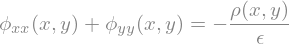

In [4]:
phi_xx = sp.Function('phi_xx')(x,y)
phi_yy = sp.Function('phi_yy')(x,y)
rho    = sp.Function('rho')(x,y)

poiss_eq = sp.Eq(phi_xx+phi_yy,-(1/e)*rho)
poiss_eq

For a charge-free space $\rho$ =0 the Laplace-equation hold

In [5]:
lap_eq=sp.Eq(phi_xx+phi_yy,0)
lap_eq

#### Defineing the grid: 
$\Delta \ x \ = \Delta \ y \ = \ 0,1 $ \
$\ 11 \ \mathbf{x}\ 11 \ Grid $

In [6]:
h=0.5                   # step size
m=int(1/h+1)            # num of steps
A = np.zeros([m*m,m*m])

#### Dirichlet boundary conditions

In [7]:
phi_1j= sp.Function('phi_1,j')(0,'y')
boun_c1 = sp.Eq(phi_1j,0)
boun_c1

In [8]:
phi_11j= sp.Function('phi_11,j')(1,'y')
boun_c2 = sp.Eq(phi_11j,1)
boun_c2

In [9]:
phi_i0= sp.Function('phi_i,0')('x','0')
boun_c3 = sp.Eq(phi_i0,0)
boun_c3

In [10]:
phi_i1= sp.Function('phi_i,1')('x','1')
boun_c4 = sp.Eq(phi_i1,0)
boun_c4

The finite difference method is used to 
